## 1. Configuration initiale

Importation des bibliothèques nécessaires et chargement des données extraites.

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configuration de la visualisation
%matplotlib inline
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Définition des chemins vers les fichiers sources
chemin_base = Path().resolve().parent.parent if 'notebooks' in str(Path().resolve()) else Path().resolve().parent
dossier_donnees_intermediaires = chemin_base / "donnees" / "intermediaires"

# Affichage du chemin
print(f"Dossier des données intermédiaires: {dossier_donnees_intermediaires}")

Dossier des données intermédiaires: C:\Users\Saint\IdeaProjects\ETL_Simple_Project\ETL_Projet_Pandemies\donnees\intermediaires


In [8]:
# Chargement des données extraites
print("Chargement des données extraites...")

donnees = {}

try:
    # Chargement des données COVID-19
    fichier_covid19 = dossier_donnees_intermediaires / "covid19_extrait.csv"
    if fichier_covid19.exists():
        donnees["covid19"] = pd.read_csv(fichier_covid19)
        print(f"Données COVID-19 chargées: {donnees['covid19'].shape[0]} lignes, {donnees['covid19'].shape[1]} colonnes")
    else:
        print(f"Impossible de charger les données COVID-19: fichier non trouvé")
    
    # Chargement des données MPOX
    fichier_mpox = dossier_donnees_intermediaires / "mpox_extrait.csv"
    if fichier_mpox.exists():
        donnees["mpox"] = pd.read_csv(fichier_mpox)
        print(f"Données MPOX chargées: {donnees['mpox'].shape[0]} lignes, {donnees['mpox'].shape[1]} colonnes")
    else:
        print(f"Impossible de charger les données MPOX: fichier non trouvé")
    
    # Chargement des données Worldometer
    fichier_worldometer = dossier_donnees_intermediaires / "worldometer_extrait.csv"
    if fichier_worldometer.exists():
        donnees["worldometer"] = pd.read_csv(fichier_worldometer)
        print(f"Données Worldometer chargées: {donnees['worldometer'].shape[0]} lignes, {donnees['worldometer'].shape[1]} colonnes")
    else:
        print(f"Impossible de charger les données Worldometer: fichier non trouvé")
    
    print("\nChargement des données terminé avec succès!")
except Exception as e:
    print(f"Erreur lors du chargement des données: {e}")

Chargement des données extraites...
Données COVID-19 chargées: 49068 lignes, 10 colonnes
Données MPOX chargées: 33666 lignes, 15 colonnes
Données Worldometer chargées: 184787 lignes, 7 colonnes

Chargement des données terminé avec succès!


## 2. Visualisation des données COVID-19

Création de visualisations pour mieux comprendre les données COVID-19.

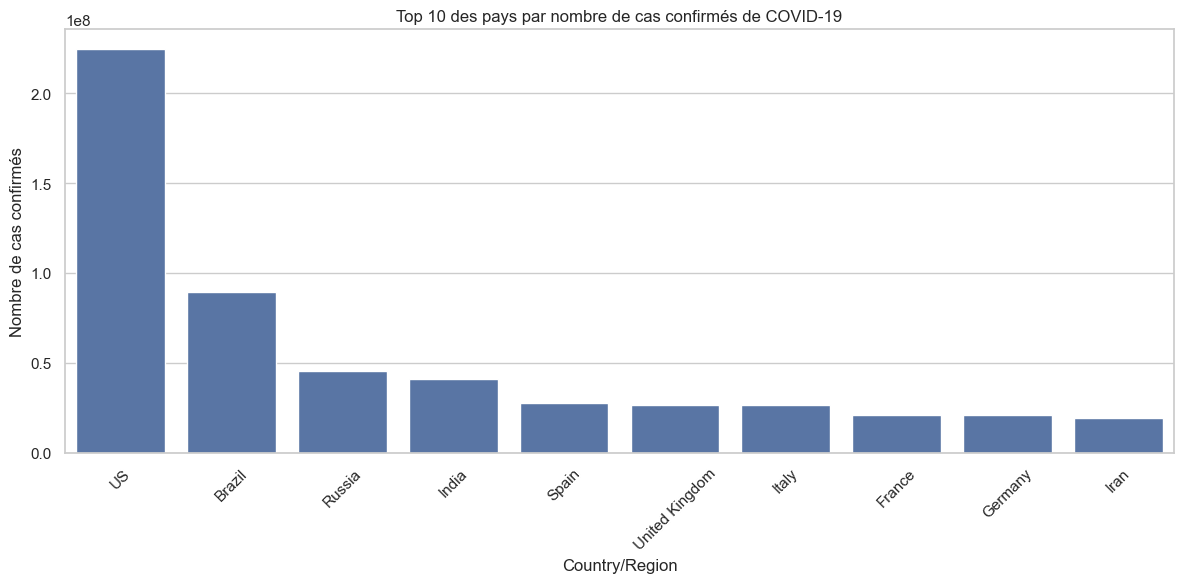

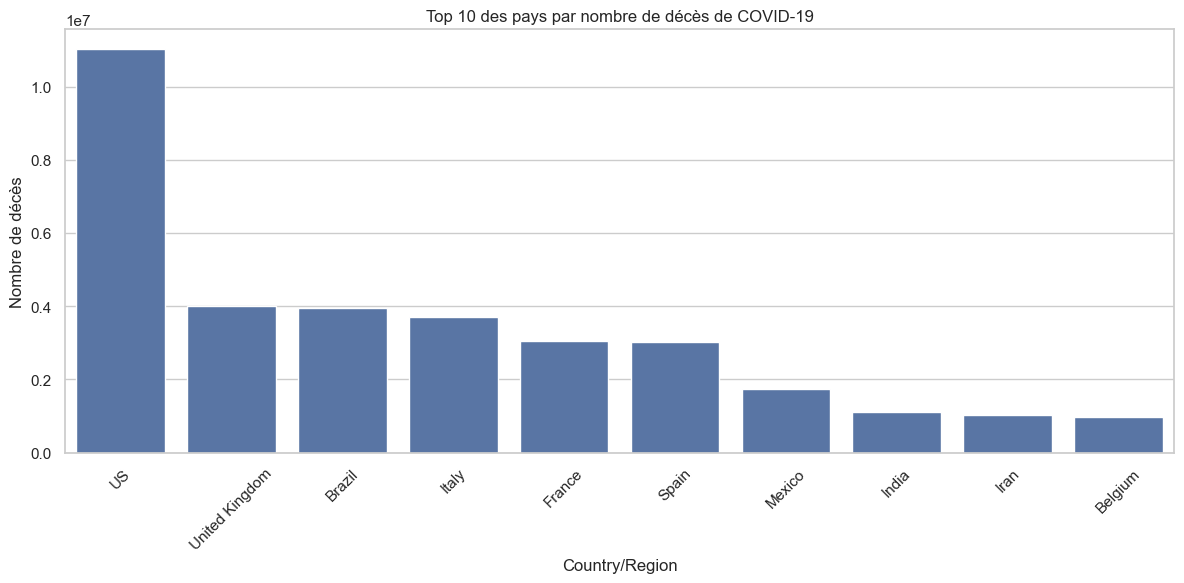

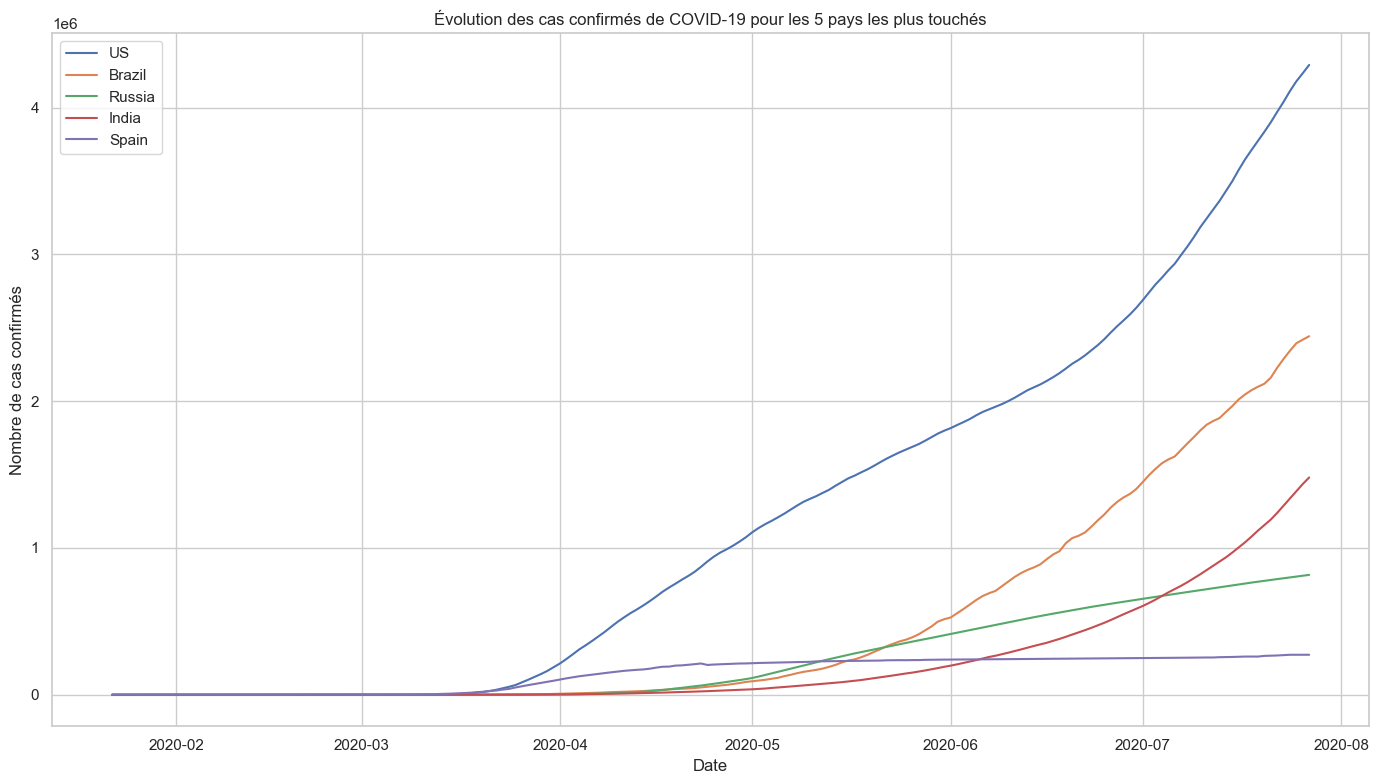

In [9]:
# Visualisation des données COVID-19
if "covid19" in donnees:
    # Conversion de la colonne Date en datetime
    donnees["covid19"]["Date"] = pd.to_datetime(donnees["covid19"]["Date"])
    
    # Top 10 des pays par nombre de cas confirmés
    plt.figure(figsize=(12, 6))
    top_pays = donnees['covid19'].groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(10)
    sns.barplot(x=top_pays.index, y=top_pays.values)
    plt.title('Top 10 des pays par nombre de cas confirmés de COVID-19')
    plt.xticks(rotation=45)
    plt.ylabel('Nombre de cas confirmés')
    plt.tight_layout()
    plt.show()
    
    # Top 10 des pays par nombre de décès
    plt.figure(figsize=(12, 6))
    top_pays = donnees['covid19'].groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False).head(10)
    sns.barplot(x=top_pays.index, y=top_pays.values)
    plt.title('Top 10 des pays par nombre de décès de COVID-19')
    plt.xticks(rotation=45)
    plt.ylabel('Nombre de décès')
    plt.tight_layout()
    plt.show()
    
    # Évolution des cas confirmés pour les 5 pays les plus touchés
    top5_pays = donnees['covid19'].groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(5).index
    plt.figure(figsize=(14, 8))
    for pays in top5_pays:
        data_pays = donnees['covid19'][donnees['covid19']['Country/Region'] == pays]
        data_pays = data_pays.groupby('Date')['Confirmed'].sum().reset_index()
        plt.plot(data_pays['Date'], data_pays['Confirmed'], label=pays)
    plt.title('Évolution des cas confirmés de COVID-19 pour les 5 pays les plus touchés')
    plt.xlabel('Date')
    plt.ylabel('Nombre de cas confirmés')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## 3. Visualisation des données MPOX

Création de visualisations pour mieux comprendre les données MPOX.

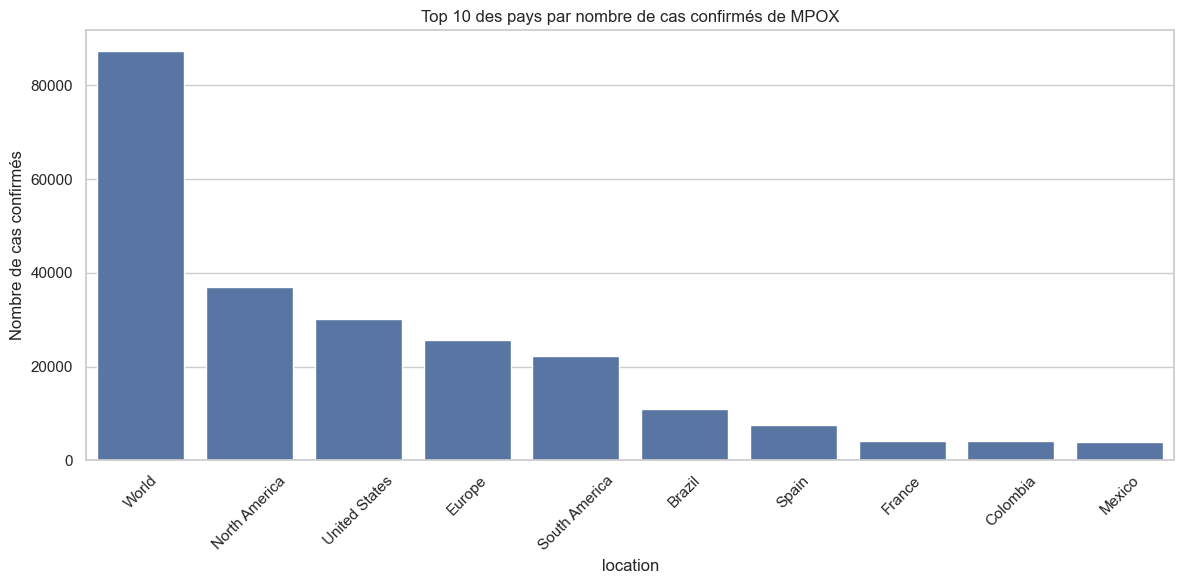

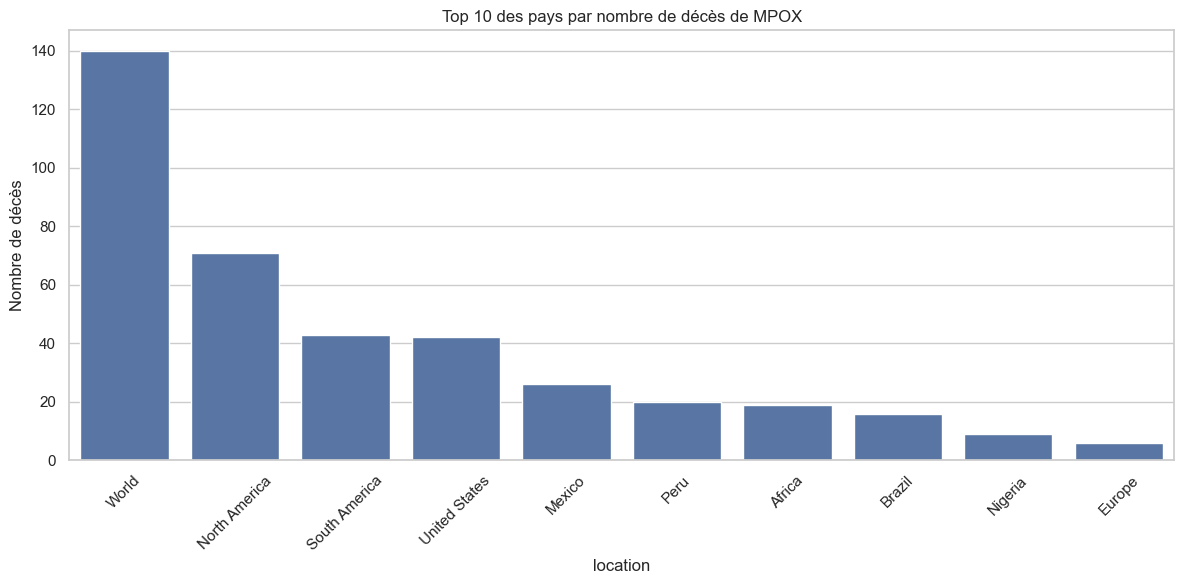

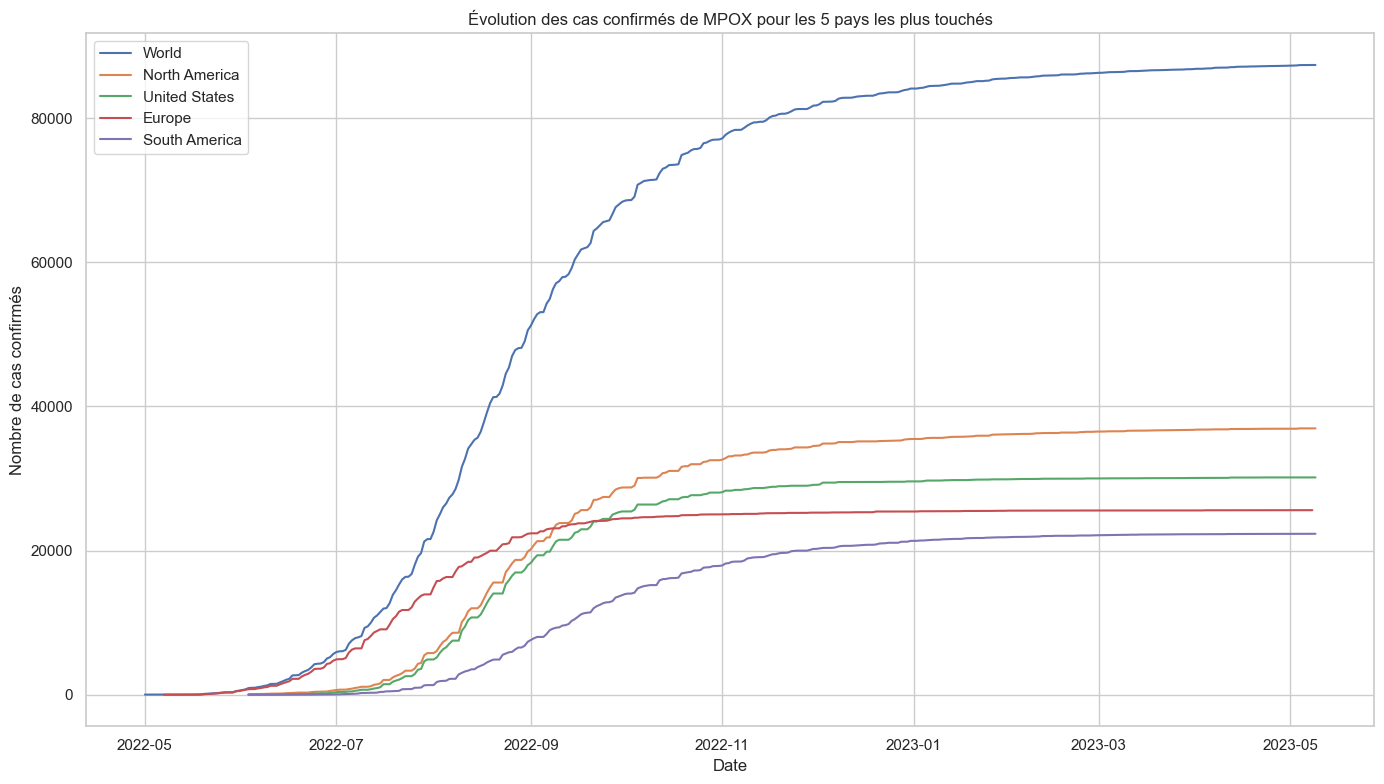

In [10]:
# Visualisation des données MPOX
if "mpox" in donnees:
    # Conversion de la colonne date en datetime
    donnees["mpox"]["date"] = pd.to_datetime(donnees["mpox"]["date"])
    
    # Top 10 des pays par nombre de cas confirmés
    plt.figure(figsize=(12, 6))
    top_pays = donnees['mpox'].groupby('location')['total_cases'].max().sort_values(ascending=False).head(10)
    sns.barplot(x=top_pays.index, y=top_pays.values)
    plt.title('Top 10 des pays par nombre de cas confirmés de MPOX')
    plt.xticks(rotation=45)
    plt.ylabel('Nombre de cas confirmés')
    plt.tight_layout()
    plt.show()
    
    # Top 10 des pays par nombre de décès
    plt.figure(figsize=(12, 6))
    top_pays = donnees['mpox'].groupby('location')['total_deaths'].max().sort_values(ascending=False).head(10)
    sns.barplot(x=top_pays.index, y=top_pays.values)
    plt.title('Top 10 des pays par nombre de décès de MPOX')
    plt.xticks(rotation=45)
    plt.ylabel('Nombre de décès')
    plt.tight_layout()
    plt.show()
    
    # Évolution des cas confirmés pour les 5 pays les plus touchés
    top5_pays = donnees['mpox'].groupby('location')['total_cases'].max().sort_values(ascending=False).head(5).index
    plt.figure(figsize=(14, 8))
    for pays in top5_pays:
        data_pays = donnees['mpox'][donnees['mpox']['location'] == pays]
        plt.plot(data_pays['date'], data_pays['total_cases'], label=pays)
    plt.title('Évolution des cas confirmés de MPOX pour les 5 pays les plus touchés')
    plt.xlabel('Date')
    plt.ylabel('Nombre de cas confirmés')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## 4. Visualisation des données Worldometer

Création de visualisations pour mieux comprendre les données Worldometer.

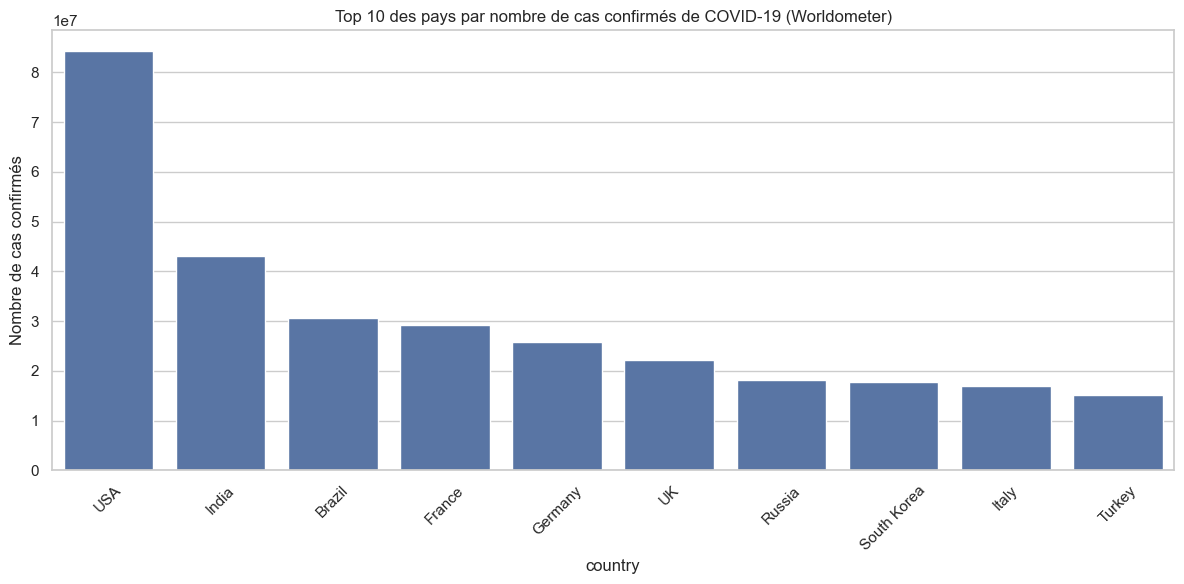

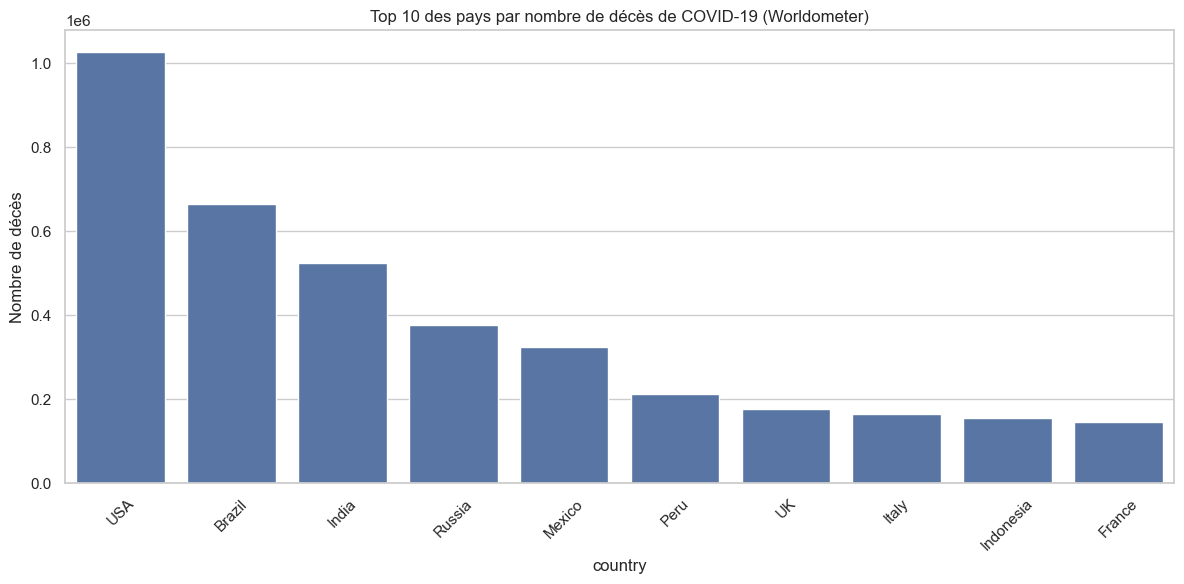

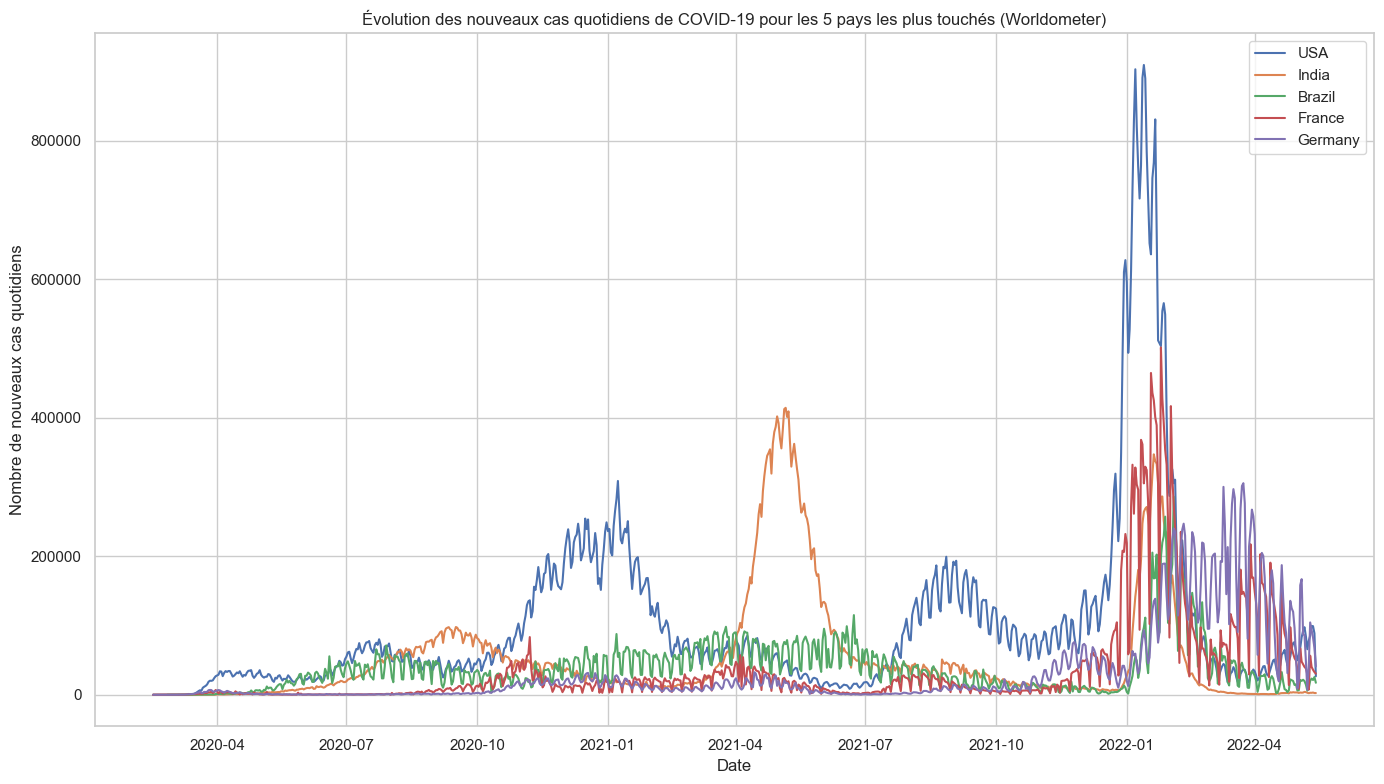

In [11]:
# Visualisation des données Worldometer
if "worldometer" in donnees:
    # Conversion de la colonne date en datetime
    donnees["worldometer"]["date"] = pd.to_datetime(donnees["worldometer"]["date"])
    
    # Top 10 des pays par nombre de cas confirmés
    plt.figure(figsize=(12, 6))
    top_pays = donnees['worldometer'].groupby('country')['cumulative_total_cases'].max().sort_values(ascending=False).head(10)
    sns.barplot(x=top_pays.index, y=top_pays.values)
    plt.title('Top 10 des pays par nombre de cas confirmés de COVID-19 (Worldometer)')
    plt.xticks(rotation=45)
    plt.ylabel('Nombre de cas confirmés')
    plt.tight_layout()
    plt.show()
    
    # Top 10 des pays par nombre de décès
    plt.figure(figsize=(12, 6))
    top_pays = donnees['worldometer'].groupby('country')['cumulative_total_deaths'].max().sort_values(ascending=False).head(10)
    sns.barplot(x=top_pays.index, y=top_pays.values)
    plt.title('Top 10 des pays par nombre de décès de COVID-19 (Worldometer)')
    plt.xticks(rotation=45)
    plt.ylabel('Nombre de décès')
    plt.tight_layout()
    plt.show()
    
    # Évolution des cas quotidiens pour les 5 pays les plus touchés
    top5_pays = donnees['worldometer'].groupby('country')['cumulative_total_cases'].max().sort_values(ascending=False).head(5).index
    plt.figure(figsize=(14, 8))
    for pays in top5_pays:
        data_pays = donnees['worldometer'][donnees['worldometer']['country'] == pays]
        plt.plot(data_pays['date'], data_pays['daily_new_cases'], label=pays)
    plt.title('Évolution des nouveaux cas quotidiens de COVID-19 pour les 5 pays les plus touchés (Worldometer)')
    plt.xlabel('Date')
    plt.ylabel('Nombre de nouveaux cas quotidiens')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## 5. Comparaison des données COVID-19 entre les sources

Comparaison des données COVID-19 entre les sources pour vérifier leur cohérence.

Pays communs aux deux sources: 165
Exemples de pays communs: Cabo Verde, Saint Lucia, Iran, Lesotho, Belarus


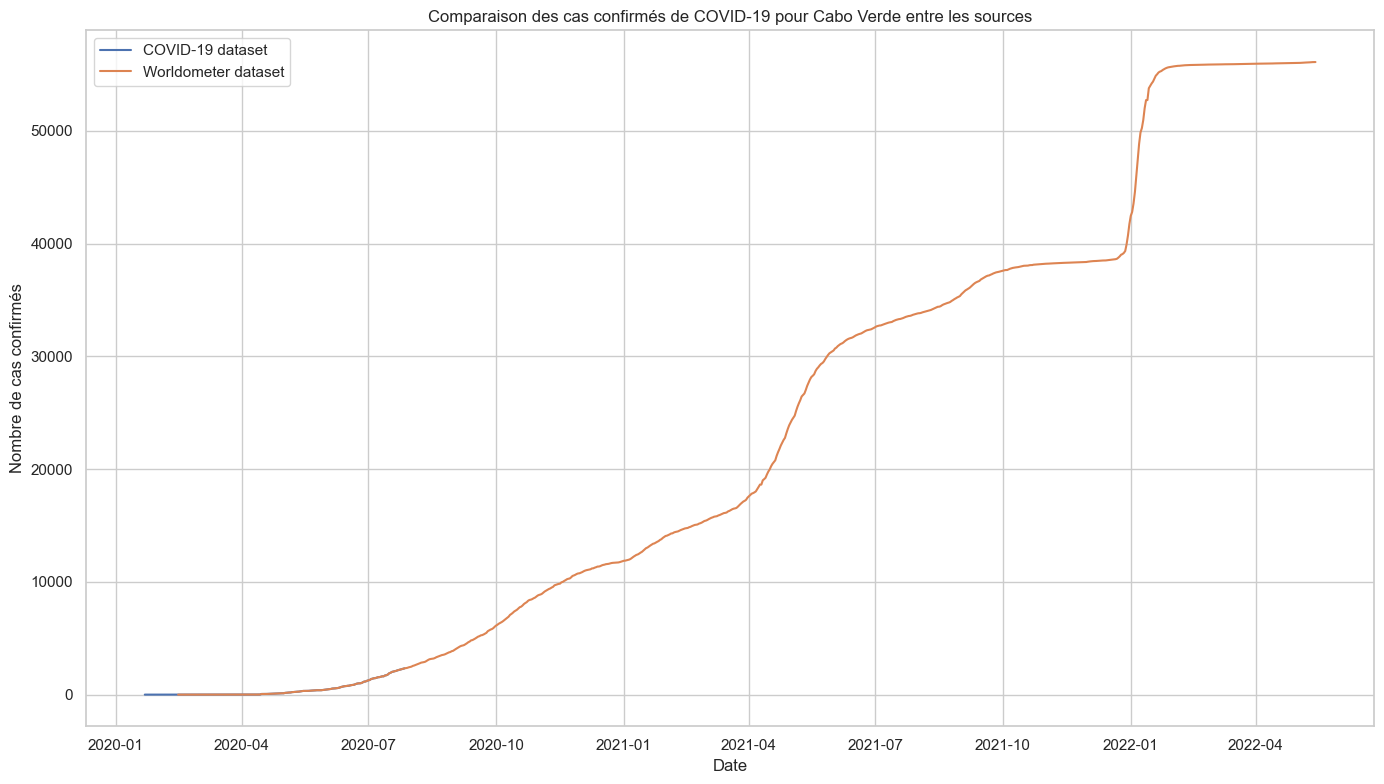

In [12]:
# Comparaison des données COVID-19 entre les sources
if "covid19" in donnees and "worldometer" in donnees:
    # Sélection des pays communs aux deux sources
    pays_covid19 = set(donnees['covid19']['Country/Region'].unique())
    pays_worldometer = set(donnees['worldometer']['country'].unique())
    pays_communs = list(pays_covid19.intersection(pays_worldometer))
    
    if pays_communs:
        print(f"Pays communs aux deux sources: {len(pays_communs)}")
        print(f"Exemples de pays communs: {', '.join(pays_communs[:5])}")
        
        # Comparaison des cas confirmés pour un pays commun (exemple: US)
        pays = 'US' if 'US' in pays_communs else pays_communs[0]
        
        # Données COVID-19
        data_covid19 = donnees['covid19'][donnees['covid19']['Country/Region'] == pays]
        data_covid19 = data_covid19.groupby('Date')['Confirmed'].sum().reset_index()
        
        # Données Worldometer
        data_worldometer = donnees['worldometer'][donnees['worldometer']['country'] == pays]
        
        # Visualisation
        plt.figure(figsize=(14, 8))
        plt.plot(data_covid19['Date'], data_covid19['Confirmed'], label='COVID-19 dataset')
        plt.plot(data_worldometer['date'], data_worldometer['cumulative_total_cases'], label='Worldometer dataset')
        plt.title(f'Comparaison des cas confirmés de COVID-19 pour {pays} entre les sources')
        plt.xlabel('Date')
        plt.ylabel('Nombre de cas confirmés')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("Aucun pays commun aux deux sources.")